# Add Hisaki_Py to pythonpath

In [4]:
# Set paths (Currently, need to run this cell every ipynb file...)
# You can add these paths to PYTHONPATH in .zshrc/.zprofile (.bashrc/.bash_profile)
# PYTHONPATH='/Users/masunaga/work/python_git/lib_open/projects/Hisaki_py:$PYTHONPATH'
# export PYTHONPATH

import sys
hskpypath = '/Users/masunaga/work/python_git/lib_open/projects/Hisaki_py/'  ## Revise the path as nessesary for your environment
if hskpypath not in sys.path:
    sys.path.append(hskpypath)

mypypath = '/Users/masunaga/work/python_git/hisaki/venus/'  ## Revise the path as nessesary for your environment
if mypypath not in sys.path:
    sys.path.append(mypypath)



In [5]:
import hskinit  ## Run hskinit

# Find fits data

In [9]:
from hskpy.general.data import get_fname  ## Import get_fname function from data module

In [10]:
fn = get_fname('venus', '20140310') ## Argments are target_body and date of data.

In [11]:
fn

'exeuv.venus.mod.02.20140310.lv.02.vr.00.fits'

In [12]:
fn_lst = get_fname('venus', '201403*')  ## If you want a list of data, you can use *.

In [13]:
fn_lst

['exeuv.venus.mod.02.20140309.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140310.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140311.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140312.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140313.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140314.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140315.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140316.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140317.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140318.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140319.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140320.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140321.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140322.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140323.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140324.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140325.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140326.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140327.lv.02.vr.00.fits',
 'exeuv.venus.mod.02.20140328.lv.02.vr.00.fits',
 'exeuv.venus.mod.02

# Open fits file and play with data (Basic method)

In [14]:
import astropy.io.fits as fits ## Hisaki_py uses astropy. You need to install it in your python environment. See https://www.astropy.org/

In [15]:
target_body = 'venus'
date = '20140310'
fn_full = get_fname(target_body, date, fullpath=True) ## Get a complete path to the file

In [16]:
hdul = fits.open(fn_full) ## Open fits file

EXTENSION=                                                                       [astropy.io.fits.card]


In [17]:
type(hdul) ## hdul stands for Header Data Unit List

astropy.io.fits.hdu.hdulist.HDUList

In [18]:
hdul[0].header ## header info at extension=0

SIMPLE  =                    T / conformity to FITS standard                    
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / possibility of presence of extensions          
EXTNAME = 'Primary '           / name of this HDU                               
EXTVER  =                    0 / version of the extension                       
NEXTEND =                  582 / Number of standard extensions                  
EXTENSION=                                                                      
ORIGIN  = 'ISAS/JAXA'                                                           
TELESCOP= 'EXCEED  '                                                            
HISTORY SOFT addHead.cc compiled at Jun  5 2014 13:40:54 (JST)                  
DATE    = '2014-06-10T23:23:26' / Date of file creation (UTC)                   
HISTORY SOFT addHead.cc comp

In [19]:
hdul[0].header['NEXTEND'] # get a header value from hdul

582

In [20]:
img_tot = hdul[1].data ## You can access the data using .data attribute. Here, the extension=1 refers to the total counts.

In [21]:
img_tot # img_tot is an array of the 2-D spectrum

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [22]:
import matplotlib.pyplot as plt  ## import pyplot module
import numpy as np ## importing numpy

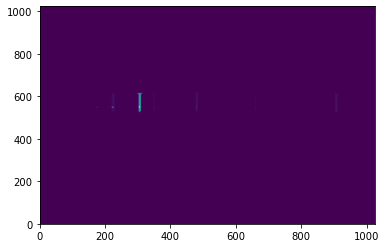

In [23]:
plt.pcolormesh(img_tot)

In [24]:
from hskpy.general.calib import get_cal, get_cal_daily ## you need calibrated data for x axis

In [25]:
xcal, C2R, C2Rtbl = get_cal_daily(date) ## get calibration data for a certain day

In [26]:
xcal ## xcal is an array of wavelength corresponding to each xbin

array([1529.428  , 1528.4949 , 1527.5608 , ...,  471.89136,  470.89728,
        469.90308], dtype=float32)

/var/folders/zp/1g2l52f125326b5gcp3jfs080000gn/T/ipykernel_91234/1052622145.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xcal, np.arange(1024), img_tot) # pcolormesh is one of the methods to plot 2D image


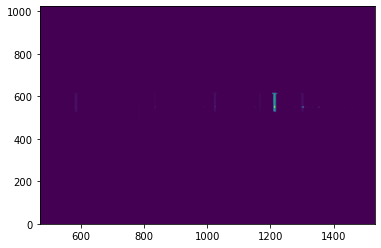

In [27]:
plt.pcolormesh(xcal, np.arange(1024), img_tot) # pcolormesh is one of the methods to plot 2D image

/var/folders/zp/1g2l52f125326b5gcp3jfs080000gn/T/ipykernel_91234/2998902661.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = plt.pcolormesh(xcal, np.arange(1024), img_tot, cmap='inferno',  norm=colors.LogNorm())


Text(0, 0.5, 'bin number along the slit')

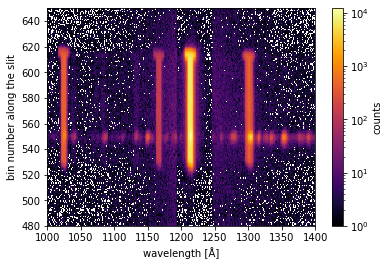

In [28]:
## You can zoom in the spectrum, add labels, and use diferent colormap, for example.
import matplotlib.colors as colors ## import it to display in logscale

mesh = plt.pcolormesh(xcal, np.arange(1024), img_tot, cmap='inferno',  norm=colors.LogNorm())
plt.colorbar(mesh, label='counts')
plt.xlim(1000, 1400) # set xrange (in wavelength)
plt.ylim(480, 650) # set yrange (in bin num)
plt.xlabel('wavelength [Å]')
plt.ylabel('bin number along the slit')

Text(0, 0.5, 'counts')

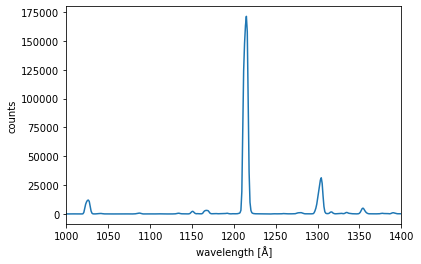

In [29]:
# To plot xprofile (wv_profile), you need to slice the 2D spectrum
xprof = np.nansum(img_tot[540:560, :], axis=0)   ## Note that the x (wv) and y (sp) elemetns of data correspond to the 2nd and 1st axes, respectively (i.e img_tot[y, x]).
plt.plot(xcal, xprof)
plt.xlim(1000, 1400) # set xrange (in wavelength)
plt.xlabel('wavelength [Å]')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

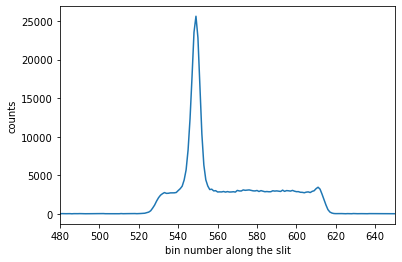

In [30]:
# To plot yprofile (sp_profile), you need to slice the 2D spectrum
idx_wv = np.where((xcal >= 1298) & (xcal <=1310))[0] ## Find indice of xcorresponding to 1298<wv<1310
yprof = np.nansum(img_tot[:, idx_wv], axis=1)
plt.plot(np.arange(1024), yprof)
plt.xlim(480, 650) # set xrange (in wavelength)
plt.xlabel('bin number along the slit')
plt.ylabel('counts')

# Use plotting functions

In [31]:
from hskpy.general.data import plot_img, plot_xprof, plot_yprof ## import plotting functions from data module

EXTENSION=                     / compiled at Jun  5 2014 13:40:54 (JST)          [astropy.io.fits.card]
EXTENSION=                                                                       [astropy.io.fits.card]
/Users/masunaga/work/python_git/lib_open/projects/Hisaki_py/hskpy/general/data.py:287: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(xcal, ycal, img/ndat,  **kwarg)


Text(0, 0.5, 'bin number along the slit')

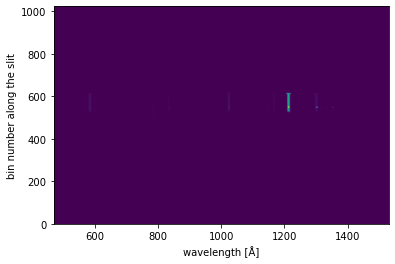

In [32]:
## plot spectrum
fig, ax=plt.subplots(1,1)
plot_img(hdul, ext=1, ax=ax)  # set ylim in which counts are integrated
ax.set_xlabel('wavelength [Å]')
ax.set_ylabel('bin number along the slit')


Text(0, 0.5, 'counts/min')

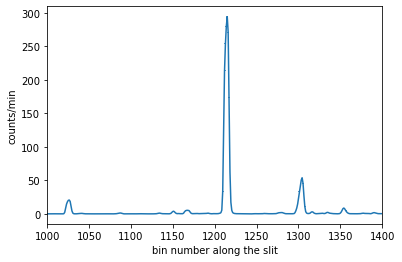

In [33]:
## plot xprof
fig, ax=plt.subplots(1,1)
plot_xprof(hdul, ext=1, ylim=[540, 560], ax=ax)  # set ylim in which counts are integrated
ax.set_xlim(1000, 1400)
ax.set_xlabel('bin number along the slit')
ax.set_ylabel('counts/min')

EXTENSION=                                                                       [astropy.io.fits.card]


Text(0, 0.5, 'counts/min')

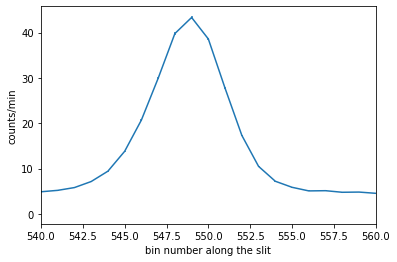

In [34]:
## plot spatial distribution of 1304, and it seems the center of venus disk is y=549 
fig, ax=plt.subplots(1,1)
plot_yprof(hdul, ext=1, wvlim=[1298, 1310], ax=ax) # set wvlim in which counts are integrated
ax.set_xlim(540,560)
ax.set_xlabel('bin number along the slit')
ax.set_ylabel('counts/min')

/var/folders/zp/1g2l52f125326b5gcp3jfs080000gn/T/ipykernel_91234/2038235818.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = plt.pcolormesh(xcal, dist, img_tot, cmap='inferno',  norm=colors.LogNorm())


Text(0, 0.5, 'Distance from Venus [arcsec]')

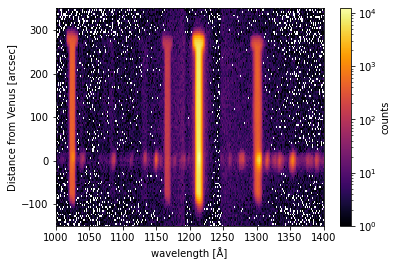

In [35]:
ycnt = 549 ## venus position
ypltscl = 4.2 ## spatial plate scale is 4.2 arcsec/pix
dist = (np.arange(1024)-ycnt)*ypltscl # Distance from Venus in arcsec

## You can zoom in the spectrum, add labels, and use diferent colormap, for example.
mesh = plt.pcolormesh(xcal, dist, img_tot, cmap='inferno',  norm=colors.LogNorm())
plt.colorbar(mesh, label='counts')
plt.xlim(1000, 1400) # set xrange (in wavelength)
plt.ylim(-150, 350) # set yrange (in bin num)
plt.xlabel('wavelength [Å]')
plt.ylabel('Distance from Venus [arcsec]')

/var/folders/zp/1g2l52f125326b5gcp3jfs080000gn/T/ipykernel_91234/2991608852.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = plt.pcolormesh(xcal, dist_Rv, img_tot, cmap='inferno',  norm=colors.LogNorm())


Text(0, 0.5, 'Distance from Venus [Rv]')

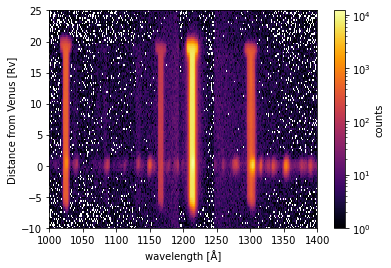

In [36]:
appdia = hdul[1].header['APPDIA'] ## Get apparent diameter (in arcsec) from header
Rv_asec = appdia/2. ## 1 Rv in arcsec
dist_Rv = dist/Rv_asec ## convert distance in arcsec to in Rv

## You can zoom in the spectrum, add labels, and use diferent colormap, for example.
mesh = plt.pcolormesh(xcal, dist_Rv, img_tot, cmap='inferno',  norm=colors.LogNorm())
plt.colorbar(mesh, label='counts')
plt.xlim(1000, 1400) # set xrange (in wavelength)
plt.ylim(-10, 25) # set yrange (in bin num)
plt.xlabel('wavelength [Å]')
plt.ylabel('Distance from Venus [Rv]')

EXTENSION=                                                                       [astropy.io.fits.card]


Text(0, 0.5, 'Counts')

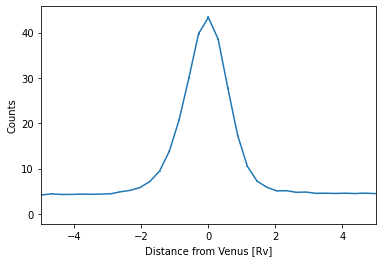

In [37]:
## plot spatial distribution of 1304 again
fig, ax=plt.subplots(1,1)
plot_yprof(hdul, ext=1, wvlim=[1298, 1310], ycal=dist_Rv, ax=ax) # set wvlim in which counts are integrated
ax.set_xlim(-5,5)
ax.set_xlabel('Distance from Venus [Rv]')
ax.set_ylabel('Counts')

In [38]:
hdul.close() ## make sure that fits data is closed after analysis

# Handling HskData object

#### I have also built the HskData object to handle fits data.

In [39]:
from hskpy.general.data import HskData ## importing HskData class
from hskpy.general.data import ext_primary, ext_total, ext_offset # extensions of primary(=0), total(=1), and offset(=2)

In [40]:
hskdat = HskData(fn)  ## Create a HskData object, opening fits file by default.

---- Opened exeuv.venus.mod.02.20140310.lv.02.vr.00.fits ----
---- Make sure that the fits data should be closed eventually. ----


EXTENSION=                                                                       [astropy.io.fits.card]


In [41]:
hskdat.get_nextend() ## get_nextend method returns the number of extensions in the fits file.

582

In [42]:
hskdat.get_header(ext_primary) ## get_header method returns the header info, depending on input extension.

SIMPLE  =                    T / conformity to FITS standard                    
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / possibility of presence of extensions          
EXTNAME = 'Primary '           / name of this HDU                               
EXTVER  =                    0 / version of the extension                       
NEXTEND =                  582 / Number of standard extensions                  
EXTENSION=                                                                      
ORIGIN  = 'ISAS/JAXA'                                                           
TELESCOP= 'EXCEED  '                                                            
HISTORY SOFT addHead.cc compiled at Jun  5 2014 13:40:54 (JST)                  
DATE    = '2014-06-10T23:23:26' / Date of file creation (UTC)                   
HISTORY SOFT addHead.cc comp

In [43]:
hskdat.get_header_value('APPDIA', ext_total) ## Get a value from the header info, using get_header_value method.

EXTENSION=                     / compiled at Jun  5 2014 13:40:54 (JST)          [astropy.io.fits.card]


28.8

In [44]:
hskdat.target_body ## Access target_body name

'venus'

In [45]:
hskdat.get_timeDt(10) ## Get time as datetime object

datetime.datetime(2014, 3, 10, 0, 8, 30)

In [46]:
img = hskdat.get_img(10) ## get image at extension=10, using get_img method

In [47]:
img.shape ## img is an array of the 2-D spectrum (1024x1024)

(1024, 1024)

In [48]:
exts = [10,11,12,13,14] ## selected extensions

In [49]:
img_sum = hskdat.get_img(exts) ## if you want to get a integrated image, just set a list of extensions as input

In [50]:
img_sum.shape # img_sum is also an array of the 2-D spectrum (1024x1024), integrating data of input extensions 

(1024, 1024)

In [51]:
timeDt = hskdat.get_timeDt(exts) # get a list of datetime objects
sDt = timeDt[0] # start time 
eDt = timeDt[-1] # end time

In [52]:
#convert datetime object to string
from hskpy.general.time import Dt2str
st = Dt2str(sDt)
et = Dt2str(eDt)
st, et

('2014-03-10T00:08:30', '2014-03-10T00:12:30')

In [53]:
xcal, c2r, c2rtbl = hskdat.get_cal(daily=True) ## get_cal method returns calibration data, same as get_cal and get_cal_daily functions.

/var/folders/zp/1g2l52f125326b5gcp3jfs080000gn/T/ipykernel_91234/1548384925.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = plt.pcolormesh(xcal, dist_Rv, img_sum, cmap='inferno',  norm=colors.LogNorm())


Text(0, 0.5, 'Distance from Venus [Rv]')

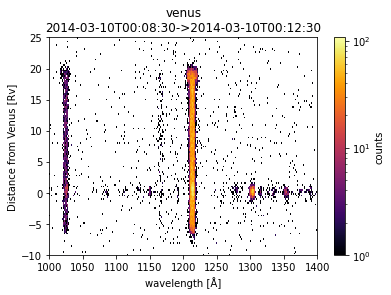

In [54]:
## You can zoom in the spectrum, add labels, and use diferent colormap, for example.
title = hskdat.target_body +'\n' +  st + '->' + et
mesh = plt.pcolormesh(xcal, dist_Rv, img_sum, cmap='inferno',  norm=colors.LogNorm())
plt.colorbar(mesh, label='counts')
plt.title(title)
plt.xlim(1000, 1400) # set xrange (in wavelength)
plt.ylim(-10, 25) # set yrange (in bin num)
plt.xlabel('wavelength [Å]')
plt.ylabel('Distance from Venus [Rv]')

In [55]:
hskdat.close()  ## Make sure that you close the fits file after analysis

---- The fits data closed. ----
